# ISYS2407 Information Systems Solutions & Design

# Exploratory Data Analysis

# ISYS2407 Information Systems Solutions & Design

# Assignment 3

# Exploratory Data Analysis

#### Student name: Thao Vy LE

#### Student number: S3970577

## 1 Import libraries

In [51]:
# Importing libraries
import numpy as np
import pandas as pd

# Library to assign missing values - not used here, better do it in EDA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer

import matplotlib.pyplot as plt
# The next statement instructs matplotlib to plot the graphs inside the notebook
%matplotlib inline 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [52]:
personal_loan_df = pd.read_csv("personal_loan.csv")

## 2 Check info

In [3]:
personal_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         6000 non-null   int64  
 1   age                 5620 non-null   float64
 2   yrs_experience      5636 non-null   float64
 3   family_size         5615 non-null   float64
 4   education_level     6000 non-null   object 
 5   income              5623 non-null   float64
 6   mortgage_amt        6000 non-null   int64  
 7   credit_card_acct    6000 non-null   object 
 8   credit_card_spend   6000 non-null   float64
 9   share_trading_acct  6000 non-null   int64  
 10  fixed_deposit_acct  6000 non-null   int64  
 11  online_acct         6000 non-null   object 
 12  personal_loan       6000 non-null   object 
dtypes: float64(5), int64(4), object(4)
memory usage: 609.5+ KB


### 2.1 Check data type

In [4]:
# What is the data type?
print(type(personal_loan_df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
# return no of rows, columns
print(personal_loan_df.shape)

(6000, 13)


In [6]:
#number of rows
print(personal_loan_df.shape[0])

6000


In [7]:
#number of columns
print(personal_loan_df.shape[1])

13


### 2.2 Display the content

In [8]:
#display 10 rows
personal_loan_df.head(10)

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815,40.0,9.0,3.0,Graduate,60.0,0,yes,1.7,0,0,yes,no
1,5737,65.0,27.0,4.0,Advanced or Professional,36.0,90,no,0.0,0,0,yes,no
2,4209,61.0,3.0,2.0,Undergraduate,145.0,314,no,0.0,0,1,yes,yes
3,4734,29.0,14.0,1.0,Undergraduate,52.0,0,no,0.0,1,0,yes,no
4,2551,43.0,23.0,4.0,Graduate,33.0,0,no,0.0,0,0,yes,no
5,4491,44.0,18.0,3.0,Advanced or Professional,49.0,0,no,0.0,0,0,yes,no
6,706,42.0,16.0,4.0,Advanced or Professional,23.0,0,no,0.0,0,0,yes,no
7,5327,64.0,38.0,2.0,Undergraduate,112.0,0,no,0.0,0,0,no,no
8,5269,43.0,7.0,4.0,Graduate,28.0,83,yes,0.9,0,0,yes,no
9,1918,25.0,8.0,1.0,Undergraduate,47.0,0,no,0.0,0,0,no,no


### 2.3 Data Overview

In [9]:
# Print the number of rows and columns (as done before)
print(f"Rows     : {personal_loan_df.shape[0]}")
print(f"Columns  : {personal_loan_df.shape[1]}" ,)
print()

Rows     : 6000
Columns  : 13



In [10]:
# Print the column names
print(f"Features : {personal_loan_df.columns.tolist()}")
print()


Features : ['customer_id', 'age', 'yrs_experience', 'family_size', 'education_level', 'income', 'mortgage_amt', 'credit_card_acct', 'credit_card_spend', 'share_trading_acct', 'fixed_deposit_acct', 'online_acct', 'personal_loan']



### 2.4 Check missing values

In [11]:
# Print the total number of null values in the data
print(f"Missing values :  {personal_loan_df.isnull().sum().values.sum()}")

Missing values :  1506


### 2. 5 Outliers

### 2.5.1 Example of Single boxplot outlier

<Axes: xlabel='credit_card_spend'>

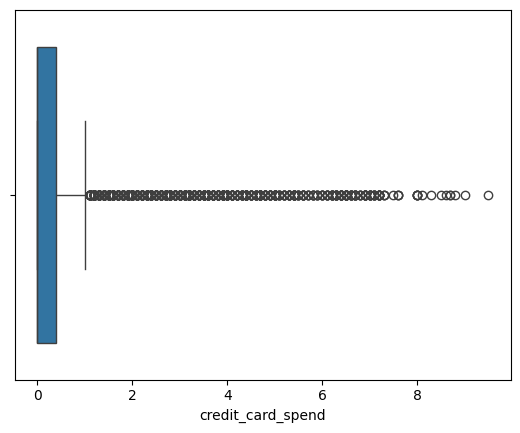

In [12]:
# Credit card spending outliers
sns.boxplot(x=personal_loan_df["credit_card_spend"])

### 2.5.2 Subplots 

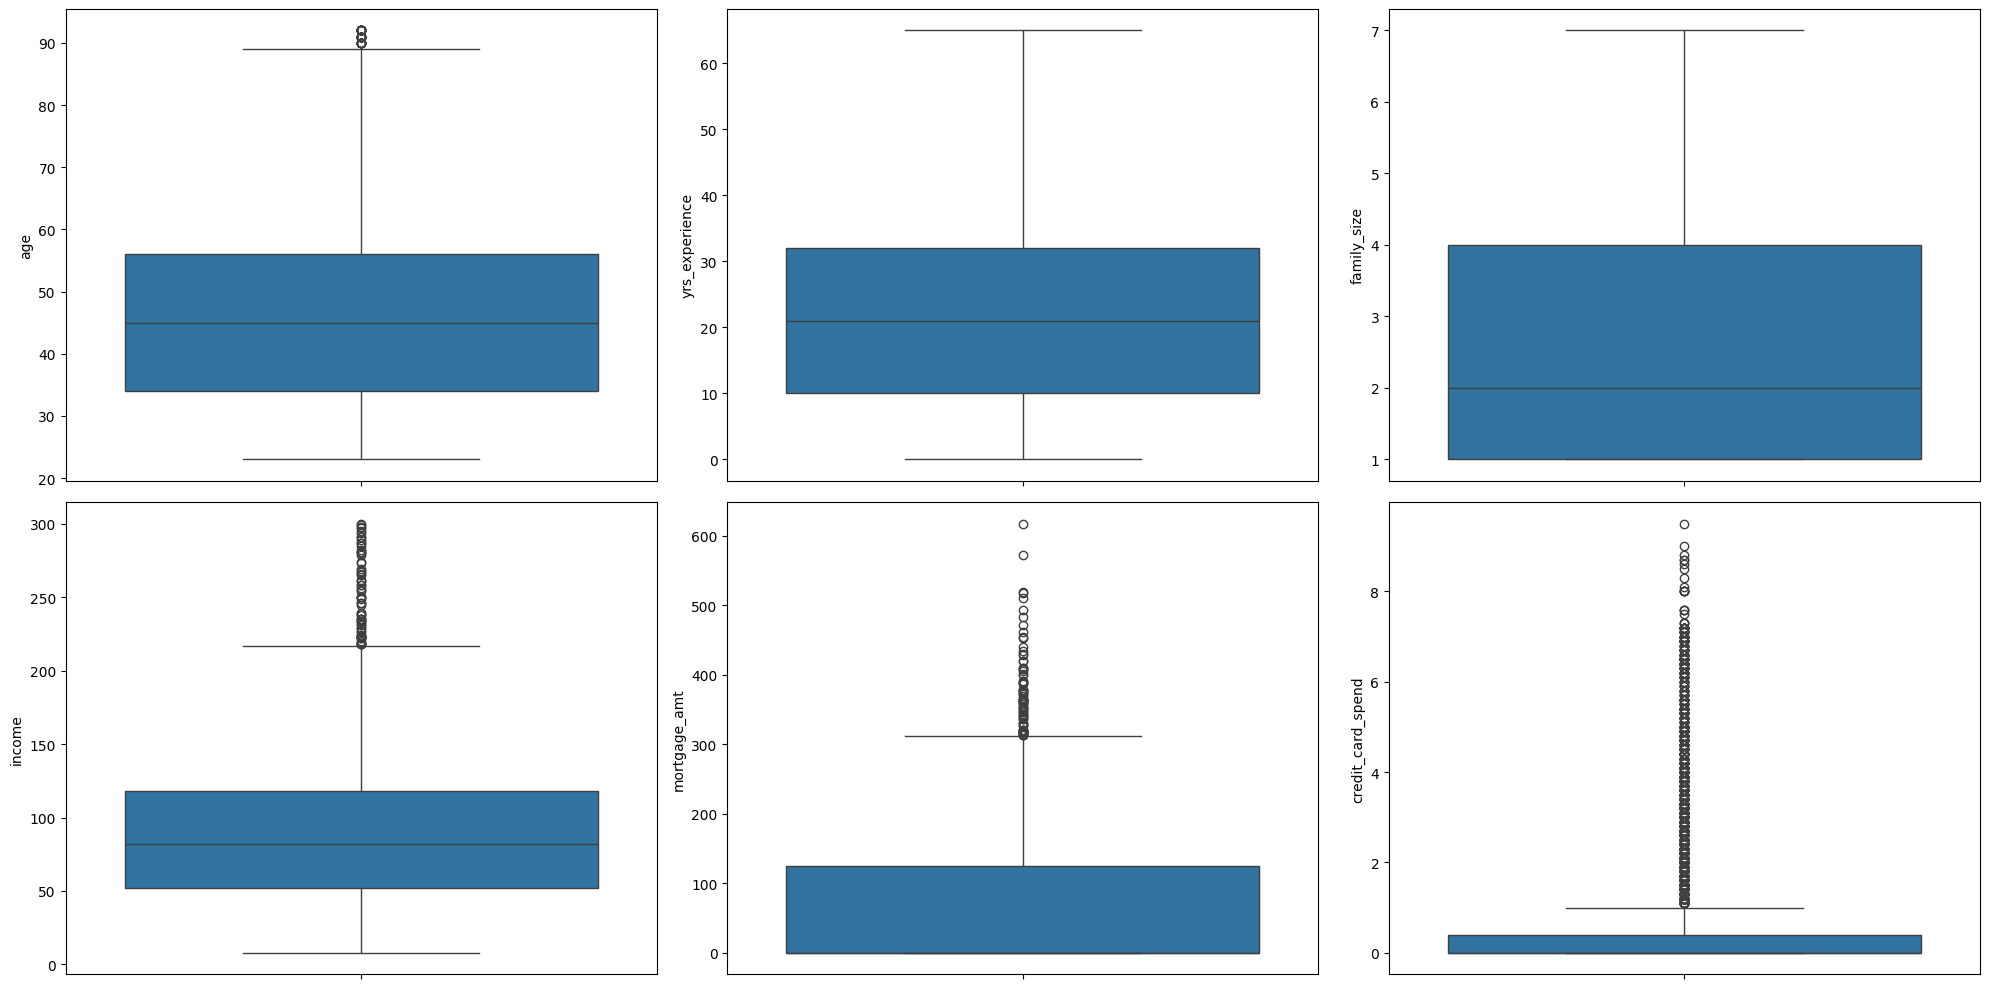

In [13]:
# import os
import os

# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    total = len(df[column])
    num_outliers = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])
    pc_outliers = round(num_outliers * 100 / total, 2)
    print(f"col: {col}, lower: {lower_bound}, upper: {upper_bound}")
    print(f"Num outliers: {num_outliers}, total rows: {total}, percent: {pc_outliers}")
    print()

fig, ax = plt.subplots(2,3, figsize=(20,10))  # 2 rows and 3 columns

# Row 0
ax1 = sns.boxplot(y=personal_loan_df["age"], ax=ax[0,0])  # rol 0 col 0
ax2 = sns.boxplot(y=personal_loan_df["yrs_experience"], ax=ax[0,1])  # col 1
ax3 = sns.boxplot(y=personal_loan_df["family_size"], ax=ax[0,2])  # rol 0 col 0
ax4 = sns.boxplot(y=personal_loan_df["income"], ax=ax[1,0])  # col 2
ax5 = sns.boxplot(y=personal_loan_df["mortgage_amt"], ax=ax[1,1])  # col 3
ax6 = sns.boxplot(y=personal_loan_df["credit_card_spend"], ax=ax[1,2])  # col 4


plt.tight_layout() 
plt.savefig('outliers-subplots-EDA.png', dpi=300) 
plt.show()

### 2.6 Check unique values

In [14]:
# For each column, print the number of unique values
# 2 unique values in column - binary categorical variable e.g. male/female, yes/no, etc
# less than 6 values in columns - still a categorical value but with more than 2 classes
# large number of values - continuous variable
print(f"Unique values :  {personal_loan_df.nunique()}")


Unique values :  customer_id           3786
age                     49
yrs_experience          47
family_size              6
education_level          3
income                 257
mortgage_amt           300
credit_card_acct         2
credit_card_spend       85
share_trading_acct       2
fixed_deposit_acct       2
online_acct              2
personal_loan            2
dtype: int64


## 3 Descriptive analytics

In [15]:
personal_loan_df.describe()

,customer_id,age,yrs_experience,family_size,income,mortgage_amt,credit_card_spend,share_trading_acct,fixed_deposit_acct
count,6000.000000,5620.000000,5636.000000,5615.000000,5623.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,3027.886667,45.556940,21.182221,2.468566,88.143873,67.585667,0.627467,0.099167,0.078167
std,1723.488432,13.373778,13.247945,1.215636,48.736053,88.155099,1.423450,0.298911,0.268456
min,3.000000,23.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000
25%,1553.750000,34.000000,10.000000,1.000000,52.000000,0.000000,0.000000,0.000000,0.000000
50%,3045.500000,45.000000,21.000000,2.000000,82.000000,0.000000,0.000000,0.000000,0.000000
75%,4511.000000,56.000000,32.000000,4.000000,118.000000,125.000000,0.400000,0.000000,0.000000
max,6000.000000,92.000000,65.000000,7.000000,300.000000,617.000000,9.500000,1.000000,1.000000


In [16]:
#Transpose rows to columns
personal_loan_df.describe().T 

,count,mean,std,min,25%,50%,75%,max
customer_id,6000.0,3027.886667,1723.488432,3.0,1553.75,3045.5,4511.0,6000.0
age,5620.0,45.556940,13.373778,23.0,34.00,45.0,56.0,92.0
yrs_experience,5636.0,21.182221,13.247945,0.0,10.00,21.0,32.0,65.0
family_size,5615.0,2.468566,1.215636,1.0,1.00,2.0,4.0,7.0
income,5623.0,88.143873,48.736053,8.0,52.00,82.0,118.0,300.0
mortgage_amt,6000.0,67.585667,88.155099,0.0,0.00,0.0,125.0,617.0
credit_card_spend,6000.0,0.627467,1.423450,0.0,0.00,0.0,0.4,9.5
share_trading_acct,6000.0,0.099167,0.298911,0.0,0.00,0.0,0.0,1.0
fixed_deposit_acct,6000.0,0.078167,0.268456,0.0,0.00,0.0,0.0,1.0


## 4 Handling missing data with median value

In [53]:
columns = ['age', 'yrs_experience', 'family_size', 'income']

# Create SimpleImputer object to replace missing values with median
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

for col in columns:
    # Using SimpleImputer to replace all missing values in column with median value
    personal_loan_df[col] = imp_median.fit_transform(personal_loan_df[col].values.reshape(-1, 1))

# Check - there should be zero percent missing values in all columns
print("\nPercentage of missing values after imputation:")
print(round(personal_loan_df.isna().mean() * 100, 4))

# Display final information about the DataFrame
print("\nFinal DataFrame after imputation:")
print(personal_loan_df.info())


Percentage of missing values after imputation:
customer_id           0.0
age                   0.0
yrs_experience        0.0
family_size           0.0
education_level       0.0
income                0.0
mortgage_amt          0.0
credit_card_acct      0.0
credit_card_spend     0.0
share_trading_acct    0.0
fixed_deposit_acct    0.0
online_acct           0.0
personal_loan         0.0
dtype: float64

Final DataFrame after imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         6000 non-null   int64  
 1   age                 6000 non-null   float64
 2   yrs_experience      6000 non-null   float64
 3   family_size         6000 non-null   float64
 4   education_level     6000 non-null   object 
 5   income              6000 non-null   float64
 6   mortgage_amt        6000 non-null   int64  
 7   credit_card

## 5 Encode all objects values

In [54]:
columns_for_encoding = ["education_level","credit_card_acct","online_acct","personal_loan" 
]
 
# Instantate label encoder
encoder = LabelEncoder()
 
# Use for loop to label encode necessary columns
for col in columns_for_encoding:
    encoder.fit(personal_loan_df[col])
    personal_loan_df[col]=encoder.transform(personal_loan_df[col])

In [55]:
#Check the data type
personal_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         6000 non-null   int64  
 1   age                 6000 non-null   float64
 2   yrs_experience      6000 non-null   float64
 3   family_size         6000 non-null   float64
 4   education_level     6000 non-null   int64  
 5   income              6000 non-null   float64
 6   mortgage_amt        6000 non-null   int64  
 7   credit_card_acct    6000 non-null   int64  
 8   credit_card_spend   6000 non-null   float64
 9   share_trading_acct  6000 non-null   int64  
 10  fixed_deposit_acct  6000 non-null   int64  
 11  online_acct         6000 non-null   int64  
 12  personal_loan       6000 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 609.5 KB


## 6 Correlations 

### 6.1 Correlations Matrix

In [20]:
correlation_matrix = personal_loan_df.corr()

# Display correlation matrix as text
print(correlation_matrix)
print

                    customer_id       age  yrs_experience  family_size  \
customer_id            1.000000  0.008639        0.017440    -0.007720   
age                    0.008639  1.000000        0.012861     0.022687   
yrs_experience         0.017440  0.012861        1.000000     0.014577   
family_size           -0.007720  0.022687        0.014577     1.000000   
education_level       -0.017862 -0.000143        0.014420     0.002641   
income                 0.000392  0.021848        0.016157     0.054539   
mortgage_amt           0.002413 -0.009309       -0.013967     0.038720   
credit_card_acct      -0.021631 -0.000229       -0.001710     0.011469   
credit_card_spend     -0.011155  0.029532        0.004980     0.024028   
share_trading_acct    -0.002944 -0.007600       -0.012589     0.000516   
fixed_deposit_acct     0.003842  0.002031       -0.017617     0.018574   
online_acct           -0.003104  0.020448       -0.006377     0.017783   
personal_loan          0.005838 -0.028

<function print>

### 6.2  Correlations Visualisation

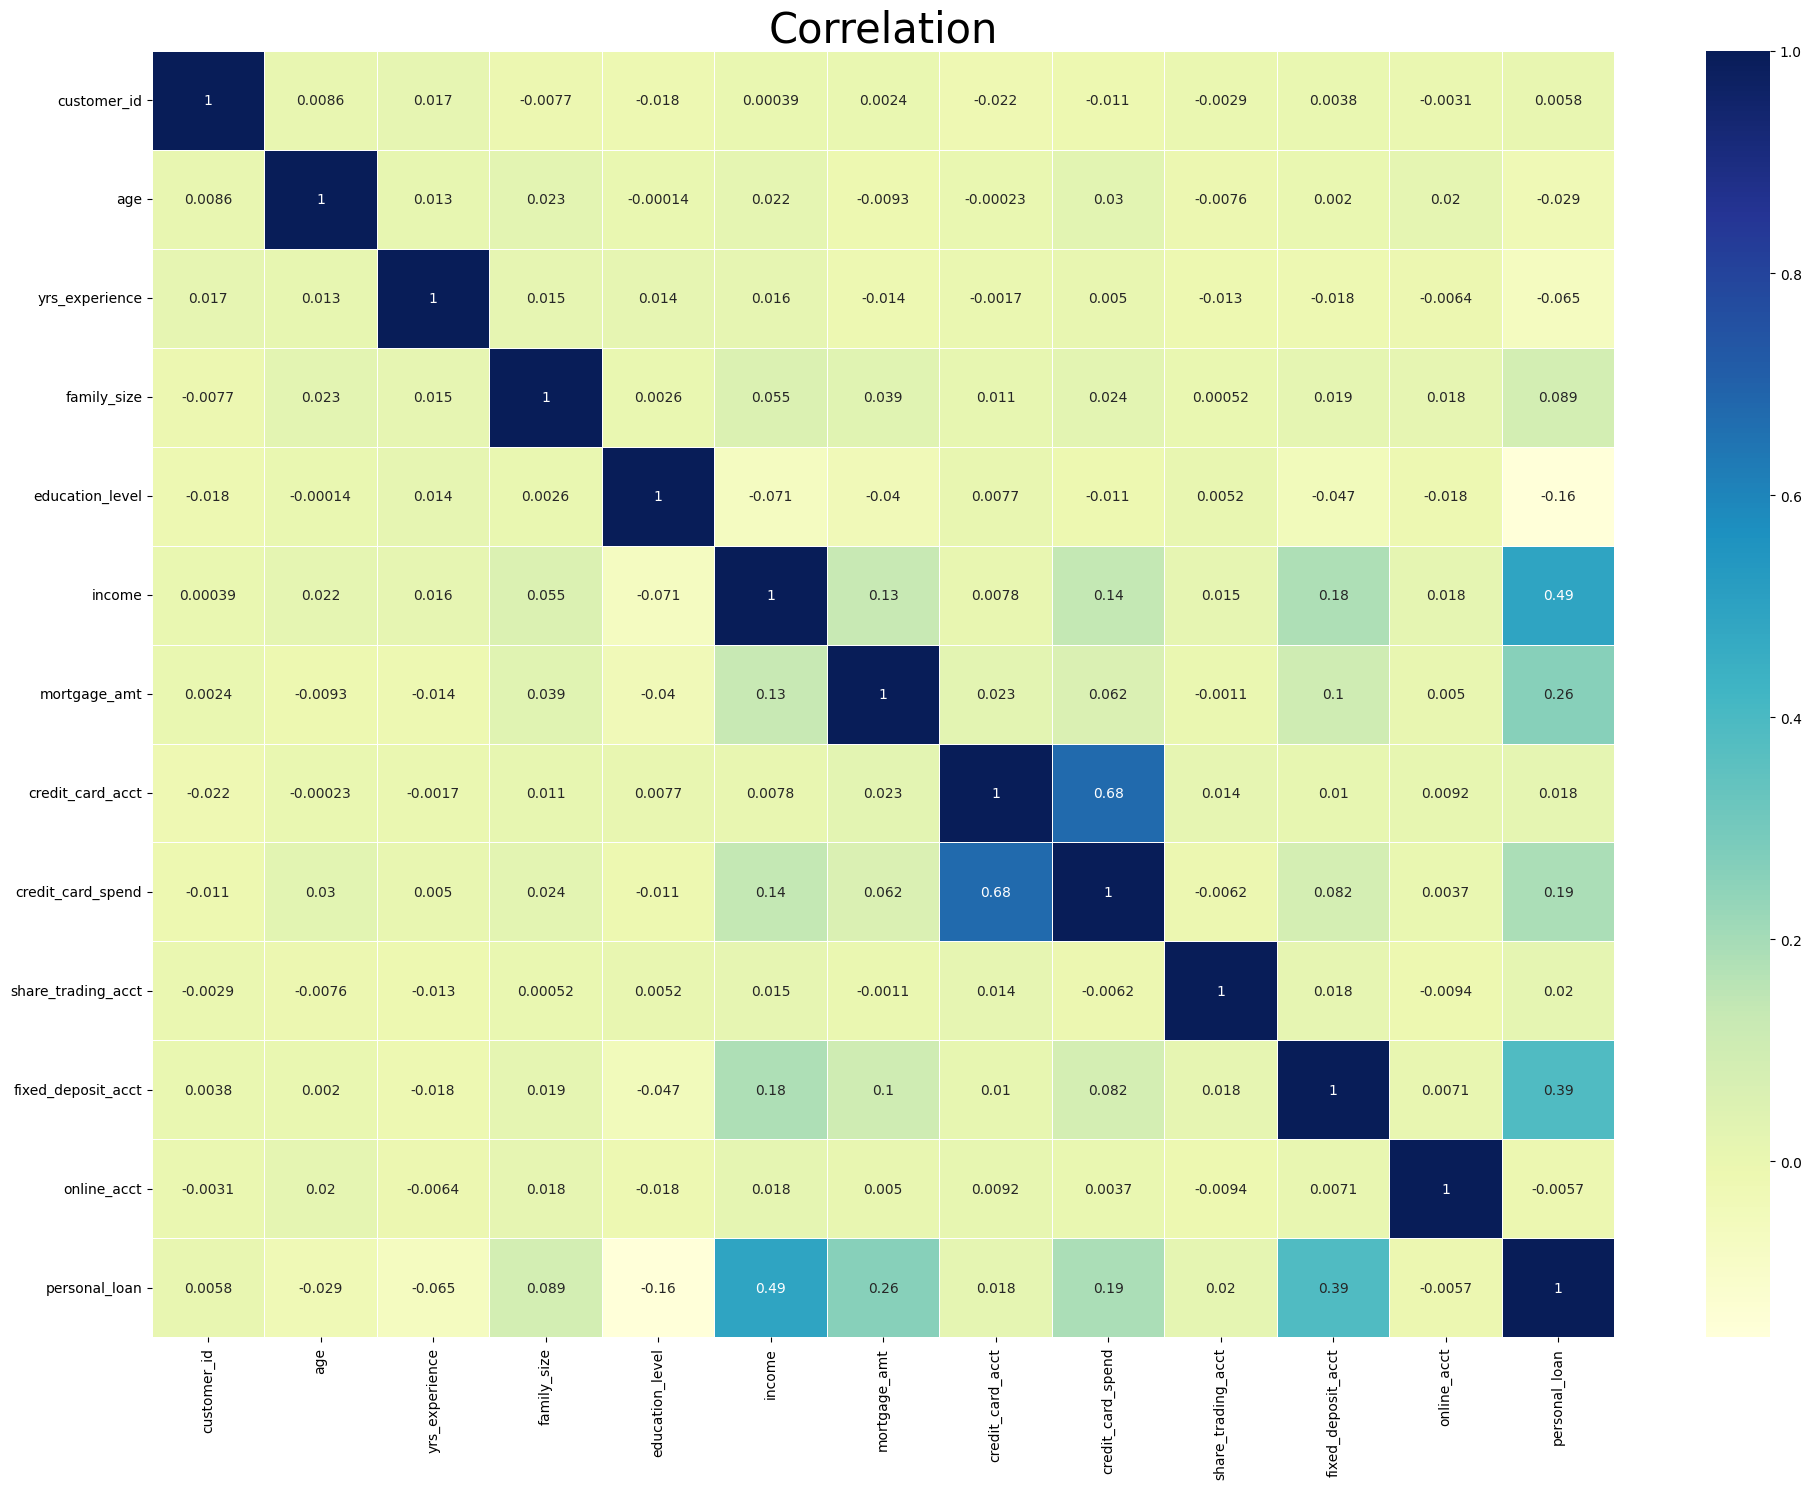

In [32]:
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(personal_loan_df.corr(), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Correlation', fontsize = 30)
plt.tight_layout() 
plt.savefig('correlation-heatmap-rectangular.png', dpi=300)

In [33]:
# Changing the matrix from rectangular to triangular

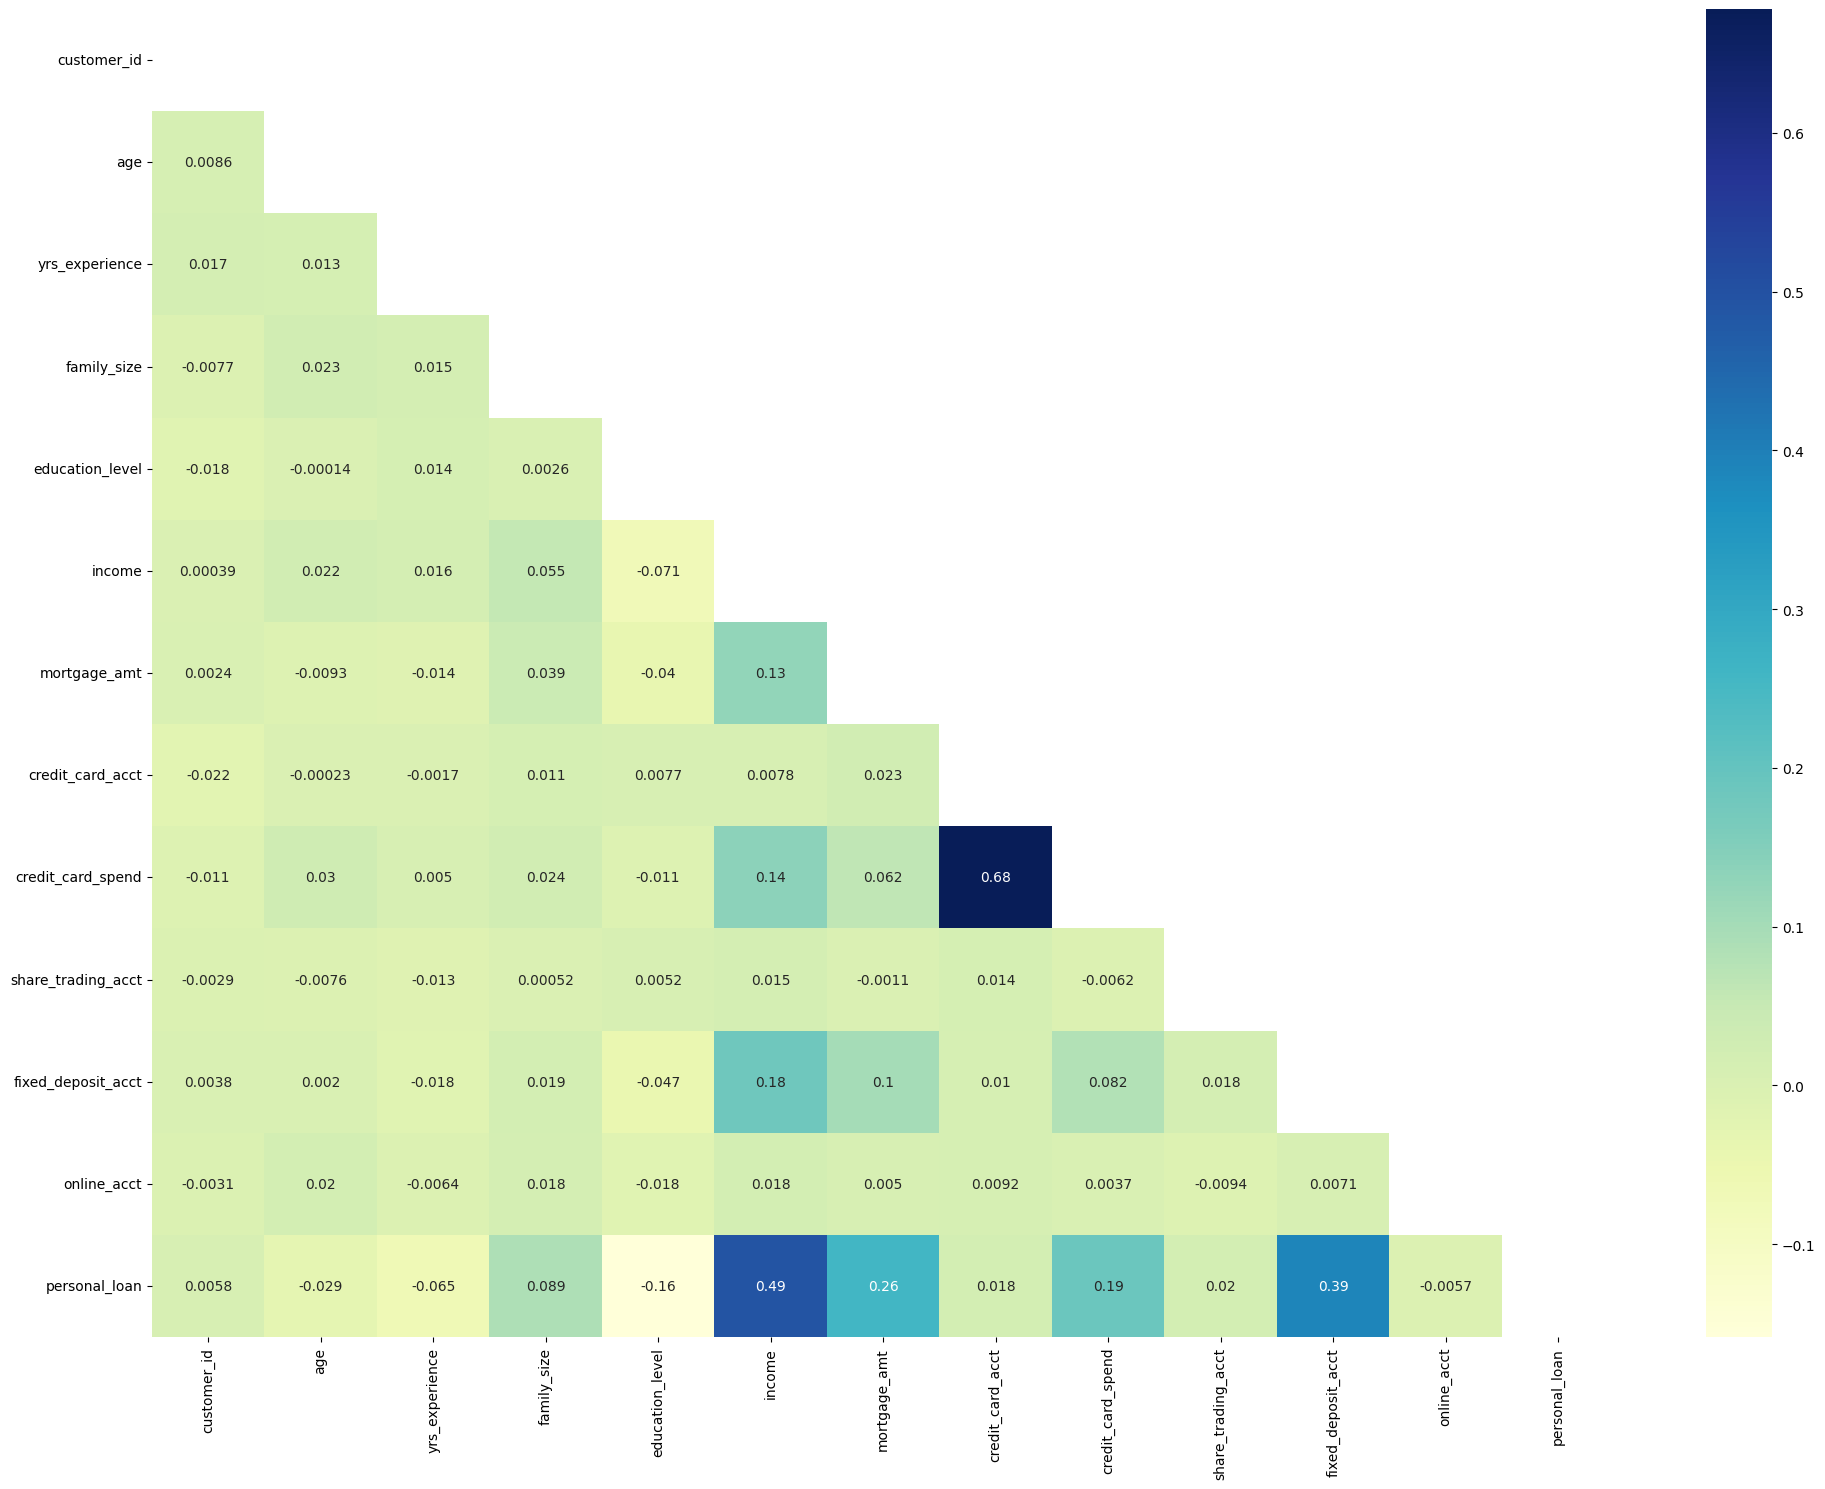

In [34]:
matrix = np.triu(personal_loan_df.corr())
sns.heatmap(personal_loan_df.corr(), annot=True, mask=matrix,  cmap="YlGnBu")

# If you want to save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('correlation-heatmap-traingular.png', dpi=300) # dpi=300 is print quality

## 7 Visualisation: Regression Seaborn's pairplot() function

In [ ]:
# The seaborn pairplot documentation can be found 
# at https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.set(style='ticks')
#plt.figure(figsize=(8,16)) #figsize(width, height) in inches - default(6.4, 4.8) - customise as required
sns.pairplot(personal_loan_df, kind="reg") # kind="reg" means plot the regression line as well

# If you want to save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('correlation-pairplot.png', dpi=300) # dpi=300 is print quality

## 8 Visualisation: Pie chart

labels: ['Approved loan rate', 'Not-approved loan rate']
values: [5100, 900]


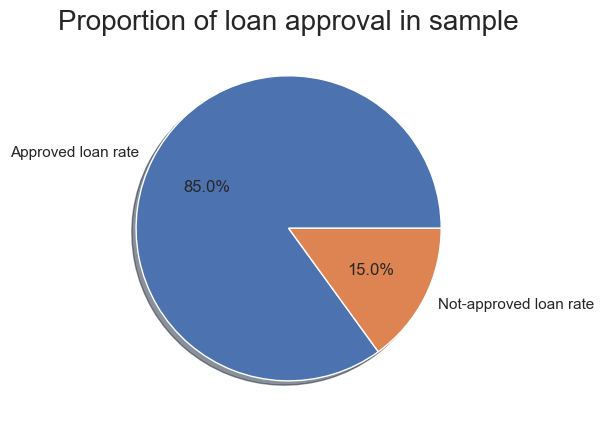

In [36]:
# Plot a pie chart
labels = ["Approved loan rate", "Not-approved loan rate"]
print(f"labels: {labels}")

# Get the values from the "outcome" column - use values to get the values
values = personal_loan_df["personal_loan"].value_counts().values.tolist()
print(f"values: {values}")

# Use matplotlib to draw a simple pie chart
# Ref: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html
plt.figure(figsize=(6,6)) #figsize(width, height) in inches - default(6.4, 4.8) - customise as required
plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title("Proportion of loan approval in sample", fontsize=20) # use fontsize=20 if title is too small

# If the fonts are too small with the default settings, you can adjust them as required
#plt.rc('font', size=10)        # adjust default text sizes (if required)
#plt.rc('axes', labelsize=10)  # adjust fontsize of labels on x/y axes (if required)
#plt.rc('axes', titlesize=10)  # adjust fontsize of titles on x/y axes (if required)
#plt.rc('xtick', labelsize=10) # adjust fontsize of tick labels on x axis (if required)
#plt.rc('ytick', labelsize=10) # adjust fontsize of tick labels on y axis (if required)
#plt.rc('legend', fontsize=10) # adjust fontsize of legend (if required)
#plt.rc('figure', titlesize=30) # adjust fontsize of legend (if required)

#plt.show() # Do not use this is you want to save to file - the file will be empty

# Save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('proportion-loan-approval.png', dpi=300)

## 9 Visualisation: loan disapproval and approval

In [22]:
#non-approved loans
non_approved_df= personal_loan_df[personal_loan_df["personal_loan"]==0]
non_approved_df.head()

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815,40.0,9.0,3.0,1,60.0,0,1,1.7,0,0,1,0
1,5737,65.0,27.0,4.0,0,36.0,90,0,0.0,0,0,1,0
3,4734,29.0,14.0,1.0,2,52.0,0,0,0.0,1,0,1,0
4,2551,43.0,23.0,4.0,1,33.0,0,0,0.0,0,0,1,0
5,4491,44.0,18.0,3.0,0,49.0,0,0,0.0,0,0,1,0


In [23]:
#approved loans
approved_df= personal_loan_df[personal_loan_df["personal_loan"]==1]
approved_df.head()

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
2,4209,61.0,3.0,2.0,2,145.0,314,0,0.0,0,1,1,1
12,2179,64.0,13.0,2.0,1,175.0,0,0,0.0,0,1,0,1
20,3181,31.0,11.0,2.0,1,182.0,262,1,4.7,1,0,1,1
21,2330,29.0,31.0,2.0,1,144.0,96,0,0.0,0,0,1,1
25,1591,45.0,19.0,1.0,1,143.0,291,0,0.0,0,1,1,1


### 9.1 Visualisation: Continuous Variables

### Impact of income on loans approval

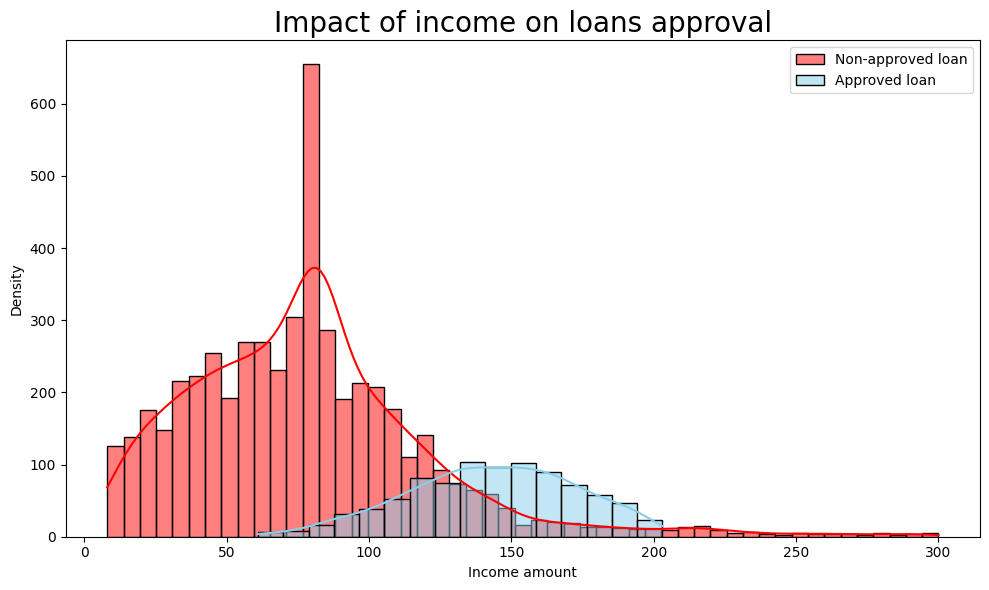

In [24]:
# figsize(width, height) in inches - default(6.4, 4.8)
plt.figure(figsize=(10,6))
# Histogram with density on y-xis (kde=True)
sns.histplot(data=non_approved_df, x="income", color="red", label="Non-approved loan", kde=True)
sns.histplot(data=approved_df, x="income", color="skyblue", label="Approved loan", kde=True)
plt.legend()
plt.title('Impact of income on loans approval', fontsize = 20)
plt.xlabel("Income amount")
plt.ylabel("Density")
# Save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('impact-of-income-on-loans-approval-histogram.png', dpi=300)

### Impact of age on loan approval

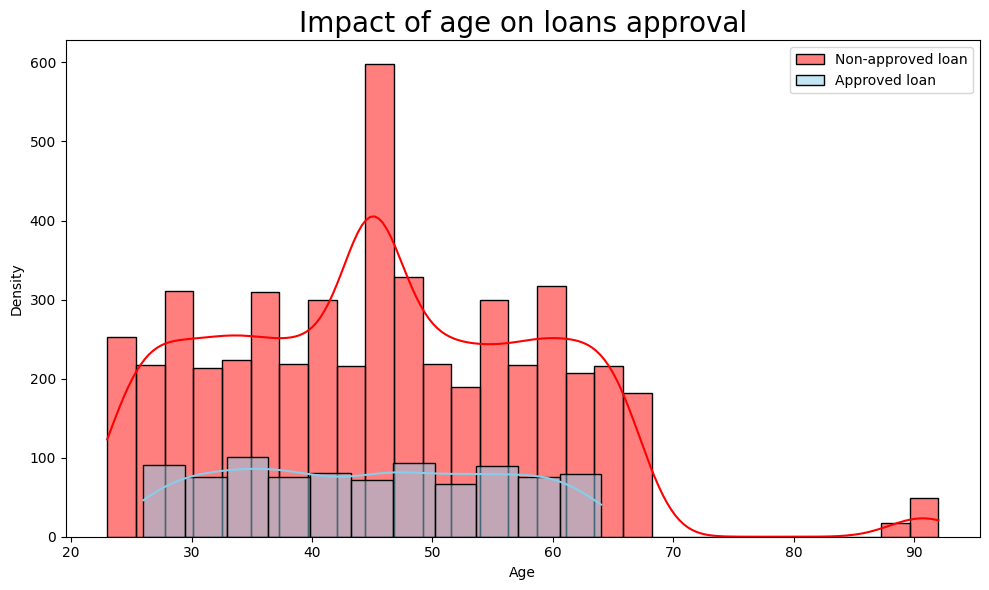

In [25]:
# figsize(width, height) in inches - default(6.4, 4.8)
plt.figure(figsize=(10,6))
# Histogram with density on y-xis (kde=True)
sns.histplot(data=non_approved_df, x="age", color="red", label="Non-approved loan", kde=True)
sns.histplot(data=approved_df, x="age", color="skyblue", label="Approved loan", kde=True)
plt.legend()
plt.title('Impact of age on loans approval', fontsize = 20)
plt.xlabel("Age")
plt.ylabel("Density")
# Save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('impact-of-age-on-loans-approval-histogram.png', dpi=300)

### Impact of mortgage amount taken on loan approval 

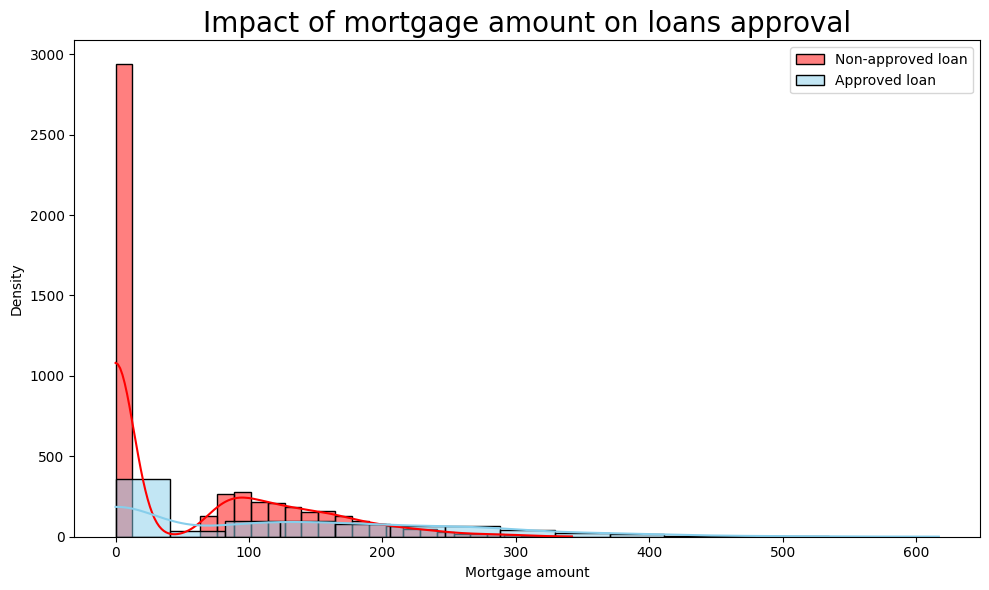

In [26]:
# figsize(width, height) in inches - default(6.4, 4.8)
plt.figure(figsize=(10,6))
# Histogram with density on y-xis (kde=True)
sns.histplot(data=non_approved_df, x="mortgage_amt", color="red", label="Non-approved loan", kde=True)
sns.histplot(data=approved_df, x="mortgage_amt", color="skyblue", label="Approved loan", kde=True)
plt.legend()
plt.title('Impact of mortgage amount on loans approval', fontsize = 20)
plt.xlabel("Mortgage amount")
plt.ylabel("Density")
# Save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('impact-of-mortgage-on-loans-approval-histogram.png', dpi=300)

### Impact of credit card monthly usage pattern on loan approval (Violin Plot)



/var/folders/x6/0009j1sd0nl9hw53n8pp_9080000gn/T/ipykernel_21750/780576233.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='personal_loan', y='credit_card_spend', data=personal_loan_df, whis=1.5, order=[0, 1], palette="pastel", legend=False)


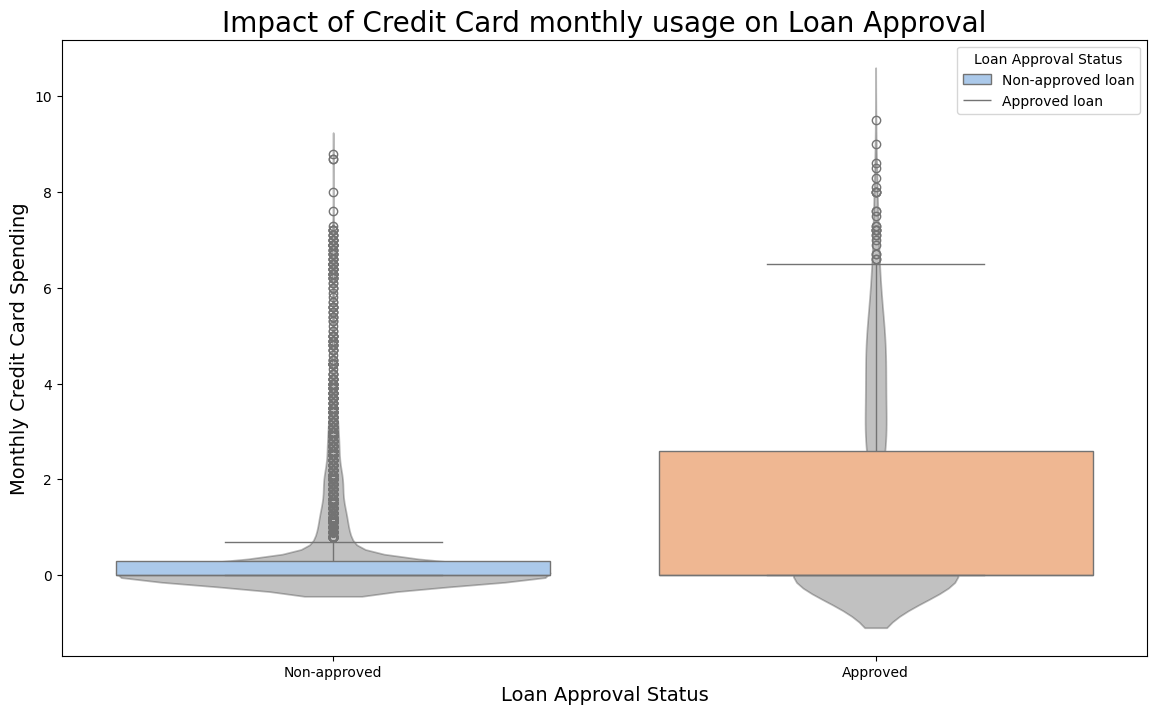

In [27]:
# Box Plot with Violin Plot Overlay
plt.figure(figsize=(14, 8))
sns.boxplot(x='personal_loan', y='credit_card_spend', data=personal_loan_df, whis=1.5, order=[0, 1], palette="pastel", legend=False)
sns.violinplot(x='personal_loan', y='credit_card_spend', data=personal_loan_df, inner=None, color=".2", alpha=0.3, dodge=False, order=[0, 1])
plt.title('Impact of Credit Card monthly usage on Loan Approval', fontsize=20)
plt.xlabel('Loan Approval Status', fontsize=14)
plt.ylabel('Monthly Credit Card Spending', fontsize=14)
plt.xticks([0, 1], ['Non-approved', 'Approved'])
plt.legend(title='Loan Approval Status', labels=['Non-approved loan', 'Approved loan'])
plt.show()


### Impact of credit card monthly usage pattern on loan approval (Histogram Plot)


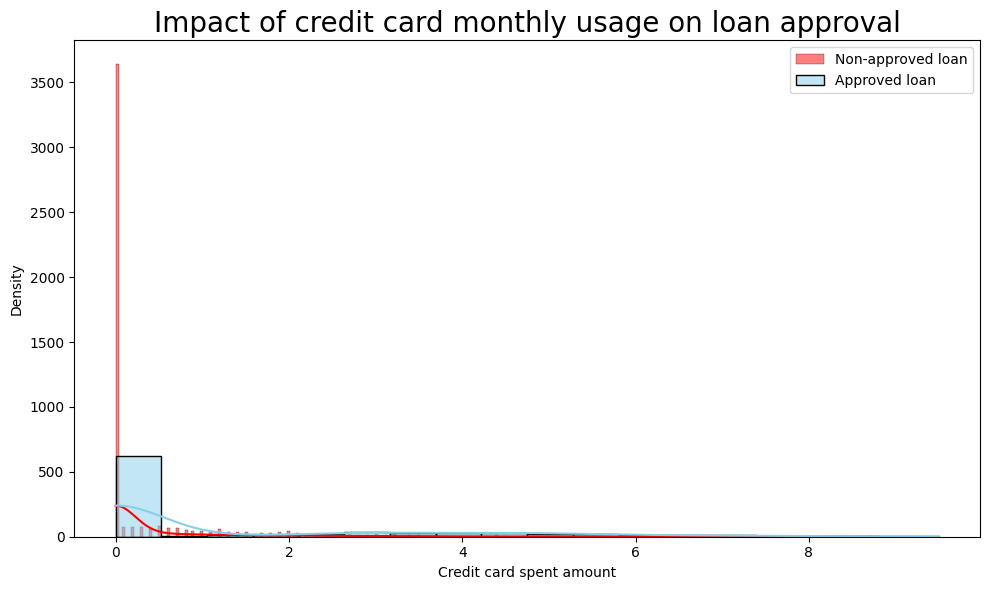

In [28]:
# figsize(width, height) in inches - default(6.4, 4.8)
plt.figure(figsize=(10,6))
# Histogram with density on y-xis (kde=True)
sns.histplot(data=non_approved_df, x="credit_card_spend", color="red", label="Non-approved loan", kde=True)
sns.histplot(data=approved_df, x="credit_card_spend", color="skyblue", label="Approved loan", kde=True)
plt.legend()
plt.title('Impact of credit card monthly usage on loan approval', fontsize = 20)
plt.xlabel("Credit card spent amount")
plt.ylabel("Density")
# Save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('impact-of-credit-card-usage-on-loans-approval-histogram.png', dpi=300)

### Categories continuous variables

### 9.2 Plotting of categorical data on separate charts

In [29]:
#Define a function to categorize AGE
def age_category(df):
    if df["age"] < 18:
        return "teenagers"
    elif 18 <= df["age"] < 25:
        return "young_adult"
    elif 25 <= df["age"] < 45:
        return "adult"
    elif 45 <= df["age"] < 60:
        return "middle_aged"
    else:
        return "senior"
    #Apply the function to all rows
personal_loan_df["age_category"] = personal_loan_df.apply(lambda row: age_category(row), axis=1)

# Check the first few rows to confirm the new column is added
personal_loan_df.head()


,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan,age_category
0,3815,40.0,9.0,3.0,1,60.0,0,1,1.7,0,0,1,0,adult
1,5737,65.0,27.0,4.0,0,36.0,90,0,0.0,0,0,1,0,senior
2,4209,61.0,3.0,2.0,2,145.0,314,0,0.0,0,1,1,1,senior
3,4734,29.0,14.0,1.0,2,52.0,0,0,0.0,1,0,1,0,adult
4,2551,43.0,23.0,4.0,1,33.0,0,0,0.0,0,0,1,0,adult


In [30]:
# Separate the resulting data into approved and non-approved loan
non_approved_df = personal_loan_df[personal_loan_df["personal_loan"]==0]
approved_df = personal_loan_df[personal_loan_df["personal_loan"]==1] 

### 9.2 Plotting of categorical data on separate charts

/var/folders/x6/0009j1sd0nl9hw53n8pp_9080000gn/T/ipykernel_21750/2125829536.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(x="age_category", data=non_approved_df, ax=ax[0], palette="pastel", order=age_order)
/var/folders/x6/0009j1sd0nl9hw53n8pp_9080000gn/T/ipykernel_21750/2125829536.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(x="age_category", data=approved_df, ax=ax[1], palette="pastel", order=age_order)


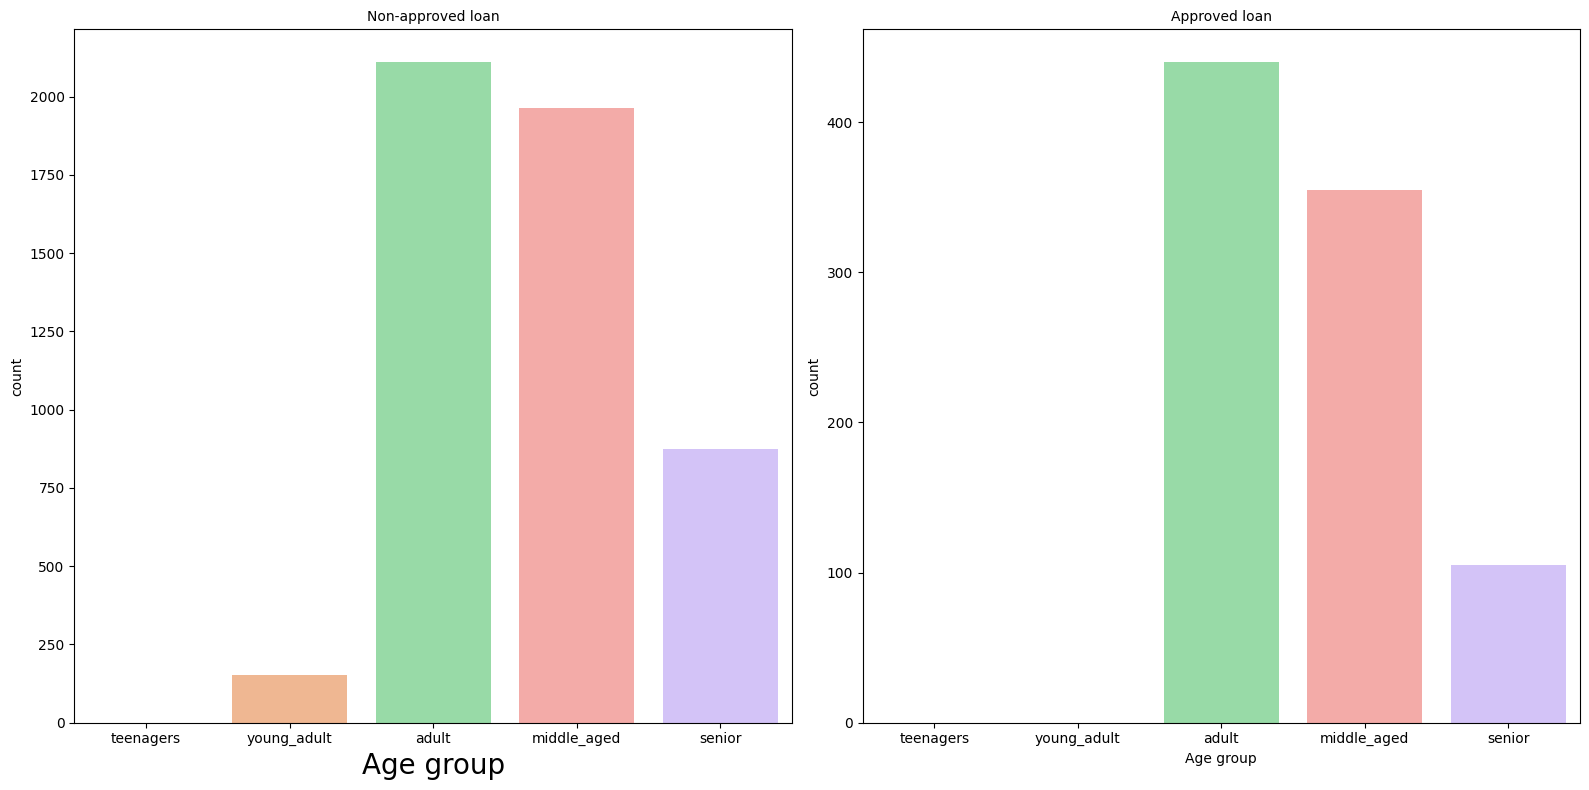

In [31]:
# Plot the charts using Seaborn's countplot()
#age order
age_order = ['teenagers', 'young_adult', 'adult', 'middle_aged', 'senior']

# AS 2 separate plots side by side
fig, ax = plt.subplots(1,2,figsize=(16, 8))
# Non-approved loan dataset
ax1 = sns.countplot(x="age_category", data=non_approved_df, ax=ax[0], palette="pastel", order=age_order)
# Approved loan dataset
ax2 = sns.countplot(x="age_category", data=approved_df, ax=ax[1], palette="pastel", order=age_order)

# If the default labels are too small - adjust them to make them bigger
#ax1.set_title("Non-approved loan") 
#ax1.set_xlabel("Age group")
#ax2.set_title("Approved loan")
#ax2.set_xlabel("Age group")
# Adjust the font sizes
ax1.set_title("Non-approved loan", fontsize=10)
ax1.set_xlabel("Age group", fontsize=20)
ax2.set_title("Approved loan", fontsize=10)
ax2.set_xlabel("Age group", fontsize=10)
ax1.tick_params(axis='both', which='both', labelsize=10) # x/y axes, minor/major ticks for ax1
ax2.tick_params(axis='both', which='both', labelsize=10) # x/y axes, minor/major ticks for ax2


# If you want to save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('age_category_side_by_side_2.png', dpi=300) # dpi=300 is print quality

### 9.3 Plotting of categorical data on a single chart

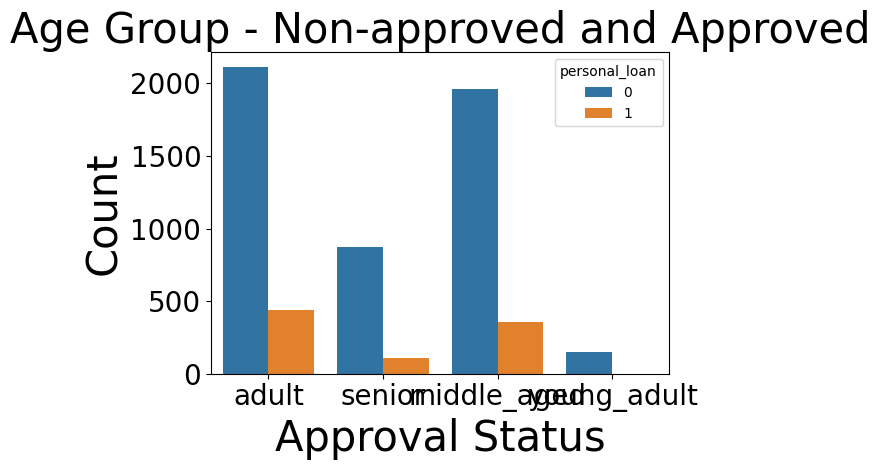

In [32]:
# Plot the charts using Seaborn's countplot()

# As a single plot
sns.countplot(x='age_category', 
              data=personal_loan_df, # Whole dataset (non-approved and approved loans)
              hue='personal_loan') # grouped by personal loan

# Adjust the font sizes
plt.title('Age Group - Non-approved and Approved', fontsize=30)
plt.xlabel("Approval Status", fontsize=30)
plt.ylabel("Count", fontsize=30)
plt.tick_params(axis='both', which='both', labelsize=20) # x/y axes, minor/major ticks for plt

# If you want to save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('age_category_single_chart.png', dpi=300) # dpi=300 is print quality

## 10 Univariate visualisation

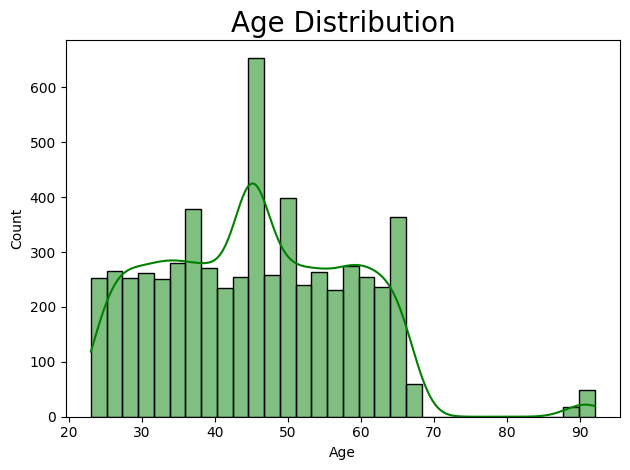

In [38]:
# Distribution of Age

sns.histplot(data=personal_loan_df, x="age", color="green", kde=True)
# Customize font size for x-axis label
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)  # You can also set the font size for the y-axis label if needed
plt.title('Age Distribution', fontsize=20) 


# If you want to save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('age-histogram.png', dpi=300) # dpi=300 is print quality

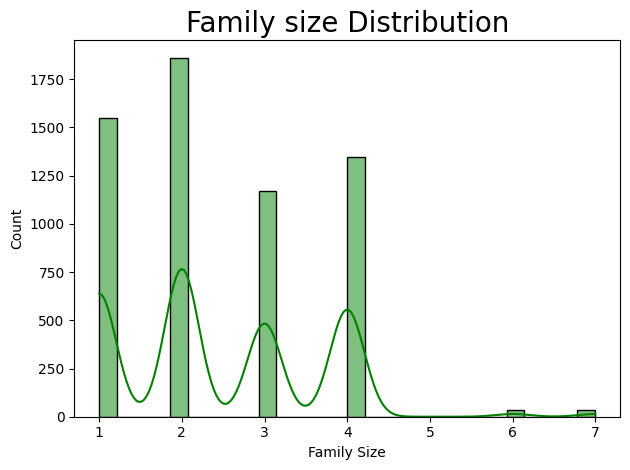

In [39]:
# Distribution of Family size

sns.histplot(data=personal_loan_df, x="family_size", color="green", kde=True)
# Customize font size for x-axis label
plt.xlabel('Family Size', fontsize=10)
plt.ylabel('Count', fontsize=10)  # You can also set the font size for the y-axis label if needed
plt.title('Family size Distribution', fontsize=20) 


# If you want to save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('family-size-histogram.png', dpi=300) # dpi=300 is print quality

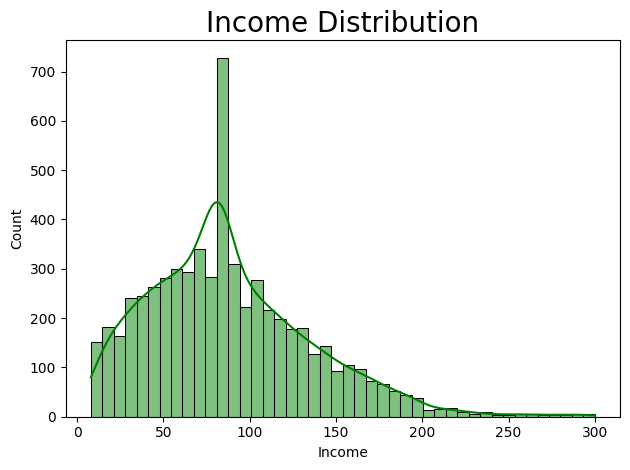

In [40]:
# Distribution of Income

sns.histplot(data=personal_loan_df, x="income", color="green", kde=True)
# Customize font size for x-axis label
plt.xlabel('Income', fontsize=10)
plt.ylabel('Count', fontsize=10)  # You can also set the font size for the y-axis label if needed
plt.title('Income Distribution', fontsize=20) 


# If you want to save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('income-histogram.png', dpi=300) # dpi=300 is print quality

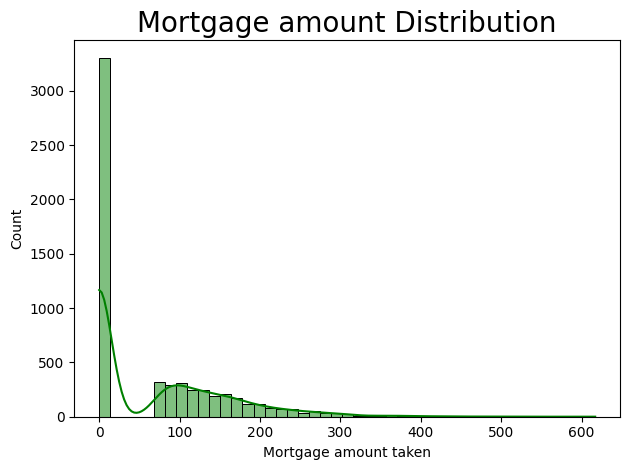

In [41]:
# Distribution of Mortgage Amount

sns.histplot(data=personal_loan_df, x="mortgage_amt", color="green", kde=True)
# Customize font size for x-axis label
plt.xlabel('Mortgage amount taken', fontsize=10)
plt.ylabel('Count', fontsize=10)  # You can also set the font size for the y-axis label if needed
plt.title('Mortgage amount Distribution', fontsize=20) 


# If you want to save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('mortgage-amount-histogram.png', dpi=300) # dpi=300 is print quality

## 11 Bivariate visualisation

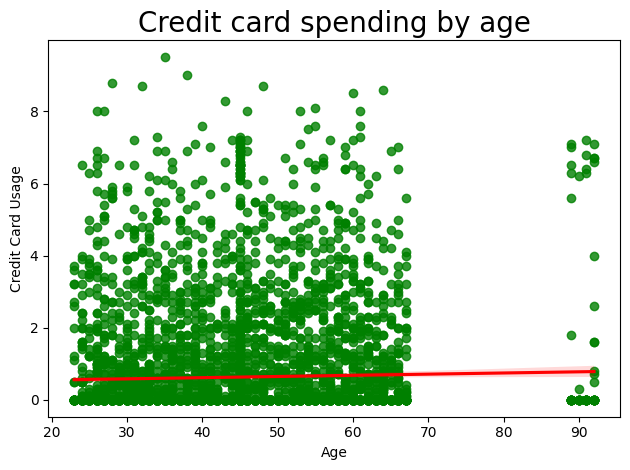

In [50]:
#Age and credit card spending usage
sns.regplot(x="age", y="credit_card_spend", data=personal_loan_df, 
            scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.title('Credit card spending by age', fontsize = 20)
plt.xlabel("Age", fontsize=10)
plt.ylabel("Credit Card Usage", fontsize=10)
plt.tick_params(axis='both', which='both', labelsize=10) # x/y axes, minor/major ticks for plt

# If you want to save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('scatterplot-age-credit-card-spend.png', dpi=300) # dpi=300 is print quality

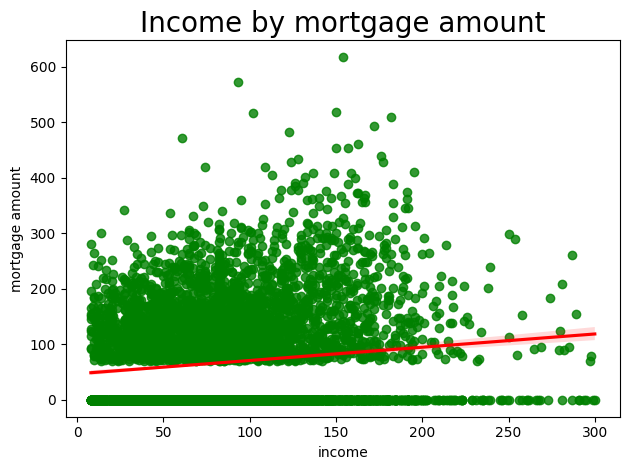

In [58]:
# Regression plot
# Ref: https://seaborn.pydata.org/generated/seaborn.regplot.html

sns.regplot(x="income", y="mortgage_amt", data=personal_loan_df, 
            scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.title('Income by mortgage amount', fontsize = 20)
plt.xlabel("income", fontsize=10)
plt.ylabel("mortgage amount", fontsize=10)
plt.tick_params(axis='both', which='both', labelsize=10) # x/y axes, minor/major ticks for plt

# If you want to save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('scatterplot-income-mortgage.png', dpi=300) # dpi=300 is print quality

/var/folders/x6/0009j1sd0nl9hw53n8pp_9080000gn/T/ipykernel_21750/386713548.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='personal_loan', y='age', data=personal_loan_df, palette='pastel')


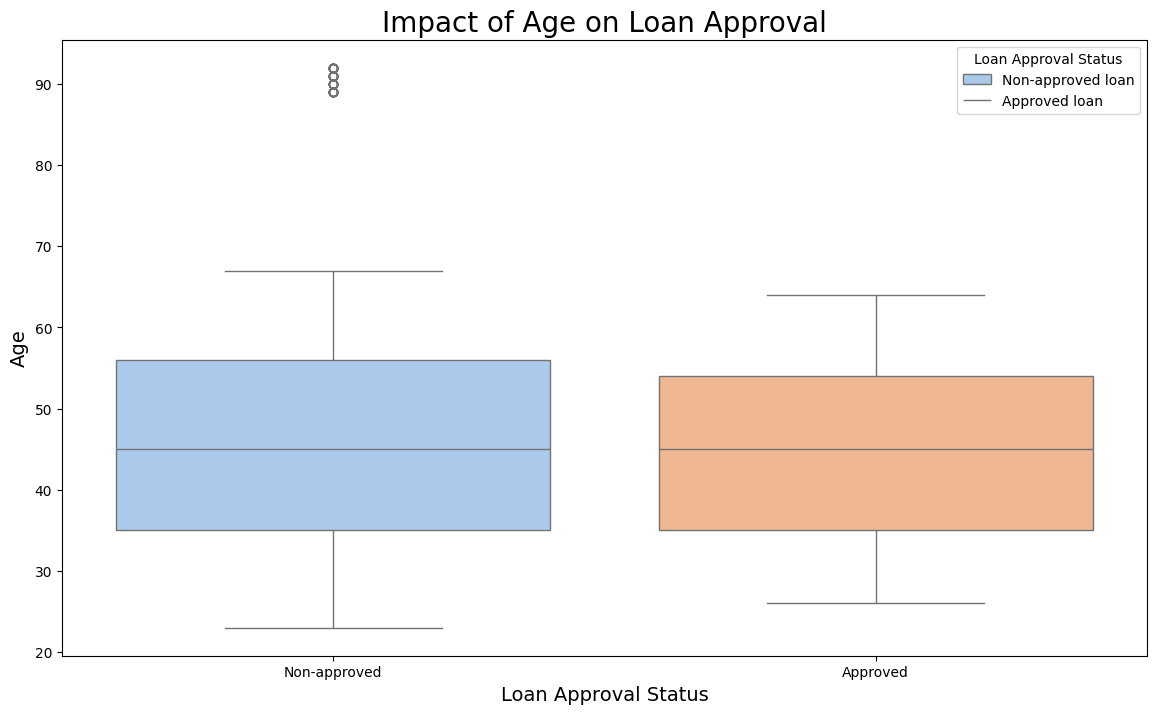

In [44]:
# Plotting the boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='personal_loan', y='age', data=personal_loan_df, palette='pastel')

# Adding title and labels
plt.title('Impact of Age on Loan Approval', fontsize=20)
plt.xlabel('Loan Approval Status', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.xticks([0, 1], ['Non-approved', 'Approved'])
plt.legend(title='Loan Approval Status', labels=['Non-approved loan', 'Approved loan'], loc='upper right')
# Save the figure
plt.savefig('boxplot-age-and-loan-approval.png')

# Show plot
plt.show()